In [1]:
import zipfile

import matplotlib.pyplot as plt
import igraph as ig
import plotly.graph_objects as go
import networkx as nx



In [2]:
def unzip_file(zip_path, extract_to):
    """
    Unzip a file from zip_path into the extract_to directory.
    """
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

unzip_file('./mammalia-macaque-dominance.zip', './data')


In [3]:

g = ig.Graph.Read_Ncol("data/mammalia-macaque-dominance.edges", weights=True, directed=False)
print(g.summary())


IGRAPH UNW- 62 1167 -- 
+ attr: name (v), weight (e)


In [4]:
print(g.summary())
print(g.es["weight"])


IGRAPH UNW- 62 1167 -- 
+ attr: name (v), weight (e)
[3.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 5.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0, 3.0, 1.0, 5.0, 2.0, 2.0, 2.0, 3.0, 4.0, 3.0, 1.0, 2.0, 1.0, 6.0, 1.0, 2.0, 1.0, 1.0, 4.0, 2.0, 1.0, 1.0, 3.0, 1.0, 5.0, 2.0, 2.0, 3.0, 1.0, 2.0, 1.0, 4.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 4.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0, 3.0, 2.0, 3.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 3.0, 5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 1.0, 6.0, 1.0, 1.0, 1.0, 2.0, 3.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 3.0, 3.0, 1.0, 6.0, 3.0, 1.0, 4.0, 5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 3.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0, 3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 5.0, 4.0, 5.0, 4.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 2.0, 3.0, 2.0, 3.0, 3.0, 1.0, 1.0, 3.0, 6.0, 1.0, 1.0, 3.0, 3.0, 2.0, 3.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 3.0, 1.0, 2.0, 1.0, 1.0, 5.0, 1.0, 1.0, 1.0, 1.0, 1

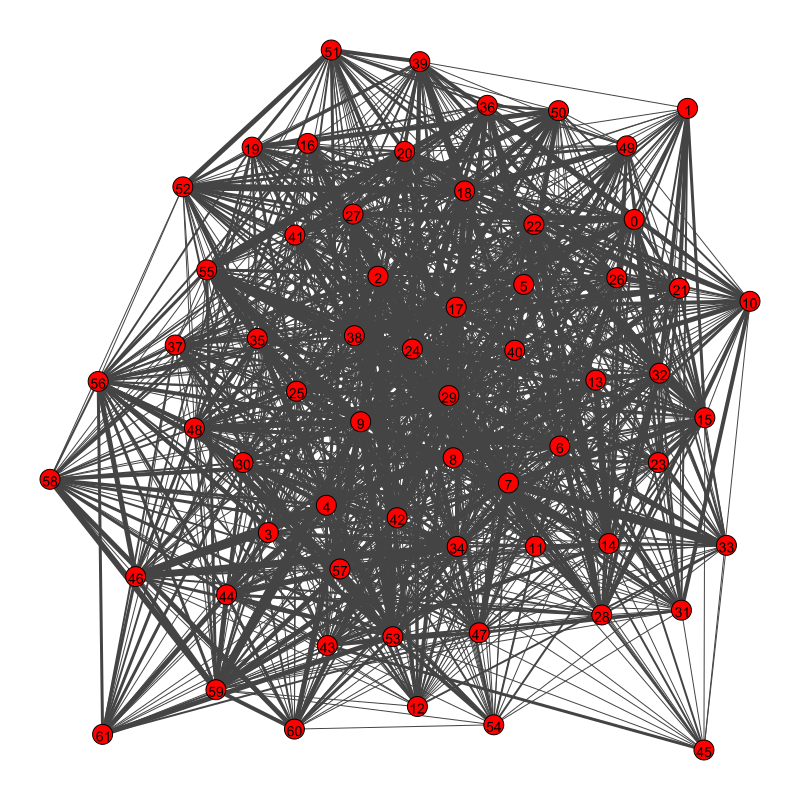

In [5]:
# Layout for node positions
layout = g.layout("fr")  # Fruchterman-Reingold (force-directed)

# Plot using igraph's built-in plot function
ig.plot(
    g,
    layout=layout,
    vertex_label=g.vs.indices,  # show node indices
    edge_width=[w for w in g.es["weight"]],
    bbox=(800, 800),
    margin=50
)

In [6]:
# Convert igraph to NetworkX (node names are preserved)
G_nx = g.to_networkx()

# Get node positions (force-directed layout)
pos = nx.spring_layout(G_nx)

# Prepare edges for Plotly
edge_x = []
edge_y = []
edge_text = []

for edge in G_nx.edges(data=True):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]
    w = edge[2].get("weight", 1)
    edge_text.append(f"{edge[0]} — {edge[1]}<br>weight: {w}")

# Create edge trace
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='text',
    mode='lines',
    text=edge_text
)

# Create node trace
node_x = []
node_y = []
for node in G_nx.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    text=[str(n) for n in G_nx.nodes()],
    textposition='top center',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        size=10,
        color='lightblue',
        line_width=1
    )
)

# Combine into figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40),
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False),
                    title="Interactive Graph with Edge Weights"
                ))

fig.show()

In [8]:
# Convert to NetworkX
G_nx = g.to_networkx()

# Get layout positions
pos = nx.spring_layout(G_nx)

# Prepare edge lines
edge_x = []
edge_y = []
for u, v in G_nx.edges():
    x0, y0 = pos[u]
    x1, y1 = pos[v]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines',
    showlegend=False
)

# Create "hover points" at edge midpoints
edge_hover_x = []
edge_hover_y = []
edge_text = []

for u, v, data in G_nx.edges(data=True):
    x0, y0 = pos[u]
    x1, y1 = pos[v]
    edge_hover_x.append((x0 + x1) / 2)
    edge_hover_y.append((y0 + y1) / 2)
    weight = data.get("weight", 1)
    edge_text.append(f"{u} — {v}<br>weight: {weight}")

edge_hover_trace = go.Scatter(
    x=edge_hover_x,
    y=edge_hover_y,
    mode='markers',
    hoverinfo='text',
    text=edge_text,
    marker=dict(size=5, color='rgba(0,0,0,0)'),  # invisible
    showlegend=False
)

# Prepare node positions
node_x = []
node_y = []
node_text = []
for node in G_nx.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(f"Node {node}")

node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    mode='markers+text',
    text=[str(n) for n in G_nx.nodes()],
    textposition='top center',
    hoverinfo='text',
    marker=dict(
        size=10,
        color='lightblue',
        line_width=1
    )
)

# Combine everything
fig = go.Figure(
    data=[edge_trace, edge_hover_trace, node_trace],
    layout=go.Layout(
        title='Interactive Graph with Edge Weights (Hover)',
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20, l=5, r=5, t=40),
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=False, zeroline=False)
    )
)

fig.show()